In [1]:
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import seaborn as sb


In [2]:
# Import studies text file
studies = pd.read_csv('C:/Users/AKapoor/Videos/Clinical Trials/ctgovdata/studies.txt', sep="|")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (24,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
studies.head()

,nct_id,nlm_download_date_description,first_received_date,last_changed_date,first_received_results_date,received_results_disposit_date,start_month_year,start_date_type,start_date,verification_month_year,...,is_fda_regulated_device,is_unapproved_device,is_ppsd,is_us_export,biospec_retention,biospec_description,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at
0,NCT03303261,ClinicalTrials.gov processed this data on Octo...,2017-10-02,2017-10-02,NaN,NaN,"April 18, 2016",Actual,2016-04-18,October 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:40:00.452499,2017-10-10 20:40:00.452499
1,NCT03292679,ClinicalTrials.gov processed this data on Octo...,2017-09-20,2017-09-20,NaN,NaN,October 2017,Anticipated,2017-10-01,September 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:41:35.778202,2017-10-10 20:41:35.778202
2,NCT03296514,ClinicalTrials.gov processed this data on Octo...,2017-09-20,2017-09-27,NaN,NaN,"July 1, 2017",Actual,2017-07-01,September 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:41:00.541701,2017-10-10 20:41:00.541701
3,NCT03128892,ClinicalTrials.gov processed this data on Octo...,2017-04-14,2017-04-20,NaN,NaN,"June 10, 2016",NaN,2016-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 21:08:03.623608,2017-10-10 21:08:03.623608
4,NCT03304262,ClinicalTrials.gov processed this data on Octo...,2017-09-21,2017-10-02,NaN,NaN,"July 18, 2017",Actual,2017-07-18,October 2017,...,t,f,f,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:39:52.031802,2017-10-10 20:39:52.031802


In [4]:
# Keep relevant columns only (23 columns of 49)
#studies_a=pd.DataFrame(studies,columns=['nct_id','overall_status'])

studies_a = pd.DataFrame(studies, columns=['why_stopped','verification_date','target_duration','study_type','start_date_type','start_date','source','phase','overall_status','official_title','number_of_arms','nct_id','limitations_and_caveats','last_known_status','last_changed_date','is_unapproved_device','is_fda_regulated_drug','is_fda_regulated_device','enrollment_type','enrollment','completion_date','brief_title','baseline_population'])



In [8]:
studies_a.head()

,why_stopped,verification_date,target_duration,study_type,start_date_type,start_date,source,phase,overall_status,official_title,...,last_known_status,last_changed_date,is_unapproved_device,is_fda_regulated_drug,is_fda_regulated_device,enrollment_type,enrollment,completion_date,brief_title,baseline_population
0,NaN,2017-10-01,NaN,Observational,Actual,2016-04-18,Groupe Hospitalier Paris Saint Joseph,NaN,Recruiting,Study On Discopathie With Modic 1,...,NaN,2017-10-02,NaN,f,f,Anticipated,50.0,2017-12-31,Study On Discopathie With Modic 1,NaN
1,NaN,2017-09-01,NaN,Interventional,Anticipated,2017-10-01,University of Maryland,NaN,Not yet recruiting,Craniofacial Applications of 3D Printing,...,NaN,2017-09-20,NaN,f,f,Anticipated,60.0,2019-09-01,Craniofacial Applications of 3D Printing,NaN
2,NaN,2017-09-01,NaN,Interventional,Actual,2017-07-01,Yale University,NaN,Recruiting,Mindfulness-Based Stress Reduction Study for C...,...,NaN,2017-09-27,NaN,f,f,Anticipated,40.0,2018-07-01,Mindfulness Based Stress Reduction for Metabol...,NaN
3,NaN,NaN,NaN,NaN,NaN,2016-06-10,[Redacted],NaN,Withheld,[Trial of device that is not approved or clear...,...,NaN,2017-04-20,NaN,NaN,NaN,NaN,NaN,NaN,[Trial of device that is not approved or clear...,NaN
4,NaN,2017-10-01,NaN,Interventional,Actual,2017-07-18,University of New Mexico,NaN,Recruiting,Metaplasticity in the Human Motor Cortex: Vali...,...,NaN,2017-10-02,f,f,t,Anticipated,16.0,2018-03-31,Metaplasticity in the Human Motor Cortex Exper...,NaN


In [10]:
studies_a.nct_id.count()

#studies_a.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

258053

In [14]:
#---------Load Countries data set-------------

countries = pd.read_csv('C:/Users/AKapoor/Videos/Clinical Trials/ctgovdata/countries.txt', sep="|")

In [15]:
countries.nct_id.count()

379080

In [9]:
countries=countries.rename(columns={'name':'country'})

In [15]:
countries.head()

,id,nct_id,country,removed
0,1700677,NCT03308747,Greece,NaN
1,1700678,NCT03309722,United Kingdom,NaN
2,1700680,NCT03309696,United States,NaN
3,1700681,NCT03309670,France,NaN
4,1700686,NCT03309579,Canada,NaN


In [36]:
countries.nct_id.count()

379080

In [19]:
countries_a=countries[countries.country == "United States"]

In [20]:
countries_a.head()

,id,nct_id,country,removed
2,1700680,NCT03309696,United States,NaN
6,1700688,NCT03309553,United States,NaN
17,1700701,NCT03309332,United States,NaN
23,1700707,NCT03309241,United States,NaN
32,1700716,NCT03309111,United States,NaN


In [21]:
countries_a.nct_id.count()

109997

In [34]:
#------Merge Countries to Studies_a ---------#

#studies_b=pd.merge(studies_a,countries, how='left',on='nct_id')

studies_b=countries.merge(studies_a, left_on='nct_id',right_on='nct_id', how='left')

In [35]:
studies_b.nct_id.count()

379080

In [40]:
studies_c=studies_b[studies_b.country == "United States"]

In [41]:
studies_c.nct_id.count()

109997

In [42]:
studies_c.head()

,id,nct_id,country,removed,why_stopped,verification_date,target_duration,study_type,start_date_type,start_date,...,last_known_status,last_changed_date,is_unapproved_device,is_fda_regulated_drug,is_fda_regulated_device,enrollment_type,enrollment,completion_date,brief_title,baseline_population
2,1700680,NCT03309696,United States,NaN,NaN,2017-10-01,NaN,Interventional,Anticipated,2017-10-30,...,NaN,2017-10-09,t,f,t,Anticipated,20.0,2019-10-30,Regulating Homeostatic Plasticity and the Phys...,NaN
6,1700688,NCT03309553,United States,NaN,NaN,2017-10-01,NaN,Interventional,Actual,2017-09-14,...,NaN,2017-10-09,NaN,f,f,Anticipated,1900.0,2020-02-01,Reducing Childhood Hearing Loss in an Alaska N...,NaN
17,1700701,NCT03309332,United States,NaN,NaN,2017-10-01,NaN,Interventional,Anticipated,2017-12-01,...,NaN,2017-10-12,f,f,t,Anticipated,1214.0,2025-12-01,AMPLATZER PFO Occluder Post Approval Study,NaN
23,1700707,NCT03309241,United States,NaN,NaN,2017-10-01,NaN,Interventional,Anticipated,2017-10-17,...,NaN,2017-10-10,NaN,t,f,Anticipated,24.0,2018-02-07,"First In Human, Single Escalating Oral Dose St...",NaN
32,1700716,NCT03309111,United States,NaN,NaN,2017-10-01,NaN,Interventional,Anticipated,2017-10-01,...,NaN,2017-10-12,NaN,t,f,Anticipated,125.0,2020-04-01,Study of GBR 1342 in Subjects With Previously ...,NaN


In [84]:

#---Only 2017 studies----------
studies_d = studies_c[(studies_c['start_date'] >= '2017-01-01') & (studies_c['start_date'] <= '2017-12-31')]


In [112]:
#studies_d.nct_id.value_counts()

In [75]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set_style('whitegrid')

In [93]:
#fig1=sb.barplot(x='country',y='enrollment',data=studies_d)

#plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


NameError: name 'ax' is not defined

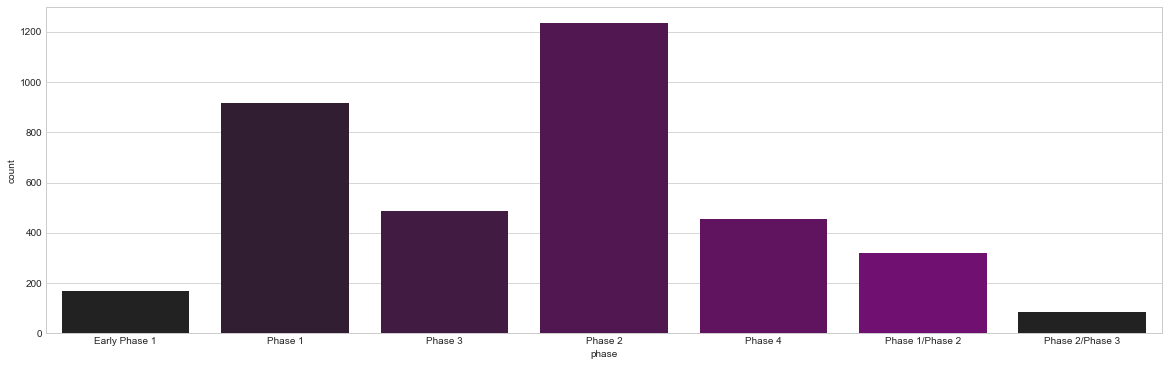

In [86]:
%matplotlib inline
rcParams['figure.figsize'] = 20,6

fig2=sns.countplot(x='phase',data=studies_d,palette=sb.dark_palette("purple"))
ax.set_xlabel('Phases')
ax.set_ylabel('Study Count')

plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


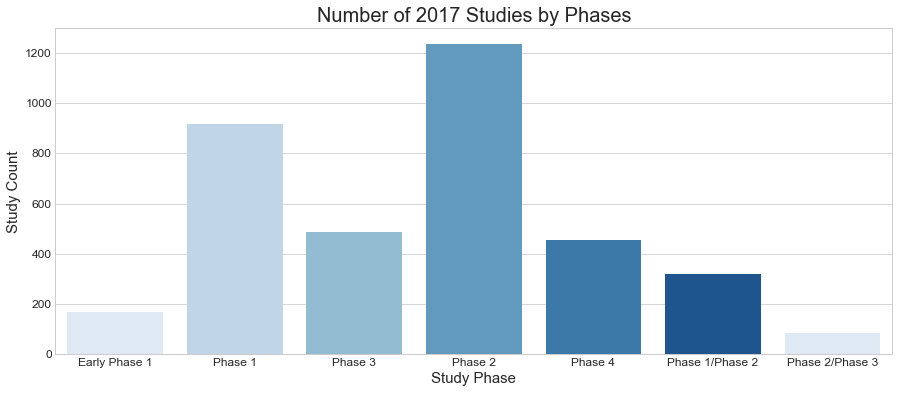

In [111]:
%matplotlib inline
rcParams['figure.figsize'] = 15,6
#widths = [1, 1 ,1,1,1,1,1]
sb.set_style('whitegrid')

fig2=sns.countplot(x='phase',data=studies_d,palette=sb.color_palette("Blues"))

fig2.axes.set_title("Number of 2017 Studies by Phases",fontsize=20)
fig2.set_xlabel("Study Phase",fontsize=15)
fig2.set_ylabel("Study Count",fontsize=15)
fig2.tick_params(labelsize=12)

plt.show()

fig2.figure.savefig("fig2.png")

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


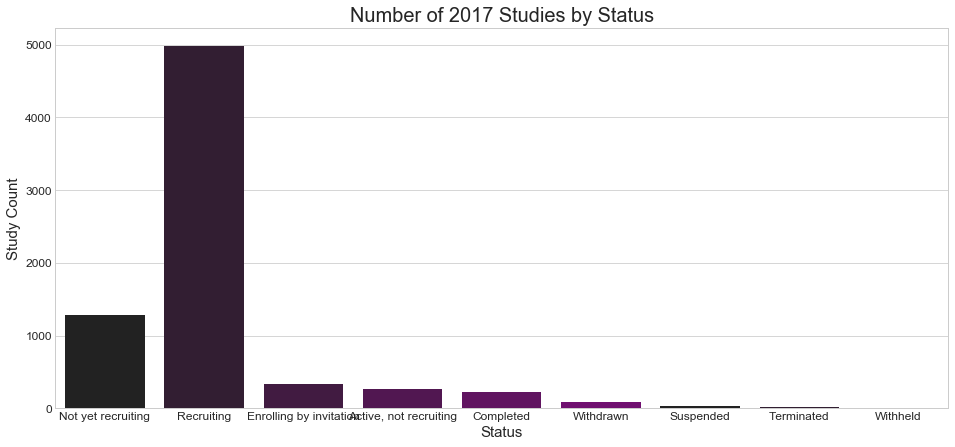

In [136]:
%matplotlib inline
rcParams['figure.figsize'] = 16,7
sb.set_style('whitegrid')

fig3=sns.countplot(x='overall_status',data=studies_d,palette=sb.dark_palette("purple"))

fig3.axes.set_title("Number of 2017 Studies by Status",fontsize=20)
fig3.set_xlabel("Status",fontsize=15)
fig3.set_ylabel("Study Count",fontsize=15)
fig3.tick_params(labelsize=12)

plt.show()

fig3.figure.savefig("fig3.png")

In [101]:
%pwd

'C:\\Users\\AKapoor\\Videos\\Clinical Trials\\Code'

In [114]:
#---------Load Sponsors data set-------------

sponsors = pd.read_csv('C:/Users/AKapoor/Videos/Clinical Trials/ctgovdata/sponsors.txt', sep="|")

In [140]:
#sponsors.nct_id.value_counts()

In [141]:
sponsors.head()

,id,nct_id,agency_class,lead_or_collaborator,name
0,1785414,NCT03328455,Other,lead,"University of Nevada, Reno"
1,1785415,NCT03329326,Other,lead,Medical University of Vienna
2,1785416,NCT03329326,Other,collaborator,University Medical Center Goettingen
3,1785417,NCT03329326,Other,collaborator,Lund University
4,1785418,NCT03329326,Other,collaborator,"Örebro University, Sweden"


In [152]:
# Drop Id in Sponsors----#------
sponsors_a=pd.DataFrame(sponsors, columns=['nct_id','lead_or_collaborator','agency_class','name'])

sponsors_a.head()

,nct_id,lead_or_collaborator,agency_class,name
0,NCT03328455,lead,Other,"University of Nevada, Reno"
1,NCT03329326,lead,Other,Medical University of Vienna
2,NCT03329326,collaborator,Other,University Medical Center Goettingen
3,NCT03329326,collaborator,Other,Lund University
4,NCT03329326,collaborator,Other,"Örebro University, Sweden"


In [151]:
sponsors_a.lead_or_collaborator.value_counts()

lead            258053
collaborator    147728
Name: lead_or_collaborator, dtype: int64

In [155]:
#sponsors_b=sponsors_a.pivot(index='nct_id', columns=['agency_class','lead_or_collaborator','name'])

sponsors_b=sponsors_a.pivot_table(values=['agency_class','lead_or_collaborator','name'],index='nct_id')

DataError: No numeric types to aggregate

In [ ]:
#------Merge Sponsors to Studies_c ---------#

#studies_b=pd.merge(studies_a,countries, how='left',on='nct_id')

studies_c1=countries.merge(studies_a, left_on='nct_id',right_on='nct_id', how='left')